In [1]:
%matplotlib widget

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import rpy2 as rp
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import os 
import rpy2.robjects as ro
import pickle
from collections import Counter
from pathlib import Path
import csv
import multiprocessing as mp
import matplotlib.pyplot as plt
import re
import fcsparser
import traceback
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [3]:
# %config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = [9,6]

In [4]:
# Pacific Orange and Alexa Fluor 750
pac = 'Pacific Orange-A'
apc = 'APC-Alexa 750-A'
eps = np.finfo(float).eps

In [5]:
base_dir = Path('../../aging/data')
base_dir = base_dir.resolve()
print(base_dir)
pickle_dir = base_dir/'ResultFiles'/'fcs-pickles'
pickle_dir.mkdir(exist_ok=True)
print(pickle_dir)
fcs_dir = base_dir/Path('ResultFiles/Flow_cytometry_result')
print(fcs_dir)

mfest_path = base_dir/Path('SDY420-DR40_Subject_2_Flow_cytometry_result.txt')
mfest_all = pd.read_csv(mfest_path, sep='\t')

mfest = mfest_all

/home/ubuntu/a/aging/data
/home/ubuntu/a/aging/data/ResultFiles/fcs-pickles
/home/ubuntu/a/aging/data/ResultFiles/Flow_cytometry_result


In [6]:
for subject, df in mfest.groupby('Subject Accession'):
    unq = df['File Name']
    if len(df['File Name'].unique()) == 1:
        fp = fcs_dir/df['File Name'].iloc[0]
        break
fp

PosixPath('/home/ubuntu/a/aging/data/ResultFiles/Flow_cytometry_result/RC4_09:23:11_RC4_09:23:11_S_11-029-0.533045.fcs')

In [7]:
meta, df = fcsparser.parse(fp)

In [8]:
df

,FSC-A,FSC-H,FSC-W,SSC-A,SSC-H,SSC-W,FITC-A,PE-A,PerCP-Cy5-5-A,PE-Cy7-A,Pacific Blue-A,APC-A,Alexa 700-A,APC-Alexa 750-A,Pacific Orange-A,Time
0,58792.324219,56465.0,68237.210938,69706.257812,62101.0,73561.929688,1146.599976,1049.099976,5350.020020,11979.239258,8326.50,1200.599976,10231.320312,16353.919922,4732.50,0.000000
1,8219.520508,8188.0,65788.289062,4680.000000,4764.0,64380.453125,98.279999,103.739998,1129.439941,358.799988,258.00,116.840004,1073.640015,328.440002,691.50,0.000000
2,42192.000000,43388.0,63729.488281,21393.058594,20636.0,67940.273438,442.259979,667.679993,5346.899902,1516.319946,1377.75,159.160004,3040.600098,1479.359985,30405.75,0.000000
3,6335.280273,6360.0,65281.277344,4123.080078,4268.0,63310.726562,-22.619999,15.599999,294.059998,-4.680000,176.25,57.960003,1311.920044,1496.840088,27.00,0.000000
4,5550.479980,5498.0,66161.554688,22354.019531,22622.0,64759.664062,220.739990,258.959991,676.259949,256.619995,497.25,74.520004,2205.239990,816.040039,1213.50,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,35898.480469,38711.0,60774.535156,22856.339844,23015.0,65084.210938,209.039993,862.679993,2741.699951,893.879944,1288.50,400.200012,3559.479980,1736.040039,3163.50,16830.199219
499996,15829.920898,13649.0,76007.750000,40329.117188,39169.0,67477.062500,351.779999,404.819977,1463.279907,797.939941,816.00,230.919998,4362.640137,7077.560059,1535.25,16830.199219
499997,34140.960938,36684.0,60992.859375,18562.439453,18632.0,65291.328125,454.739990,708.239990,3226.859863,1173.119995,4810.50,517.040039,6069.240234,7034.320312,4003.50,16830.300781
499998,127583.281250,79608.0,105030.875000,172019.640625,111352.0,101241.820312,2242.500000,3721.379883,115587.414062,53174.937500,18510.75,7047.200195,104347.320312,115618.242188,24762.75,16830.300781


In [9]:
asinh = lambda _: np.arcsinh(_/10)

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [9,6]

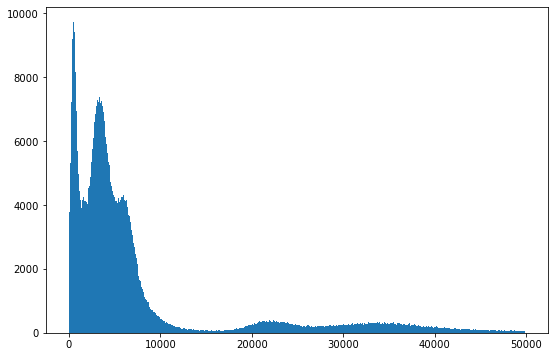

In [11]:
plt.hist(df[pac], bins=np.arange(0,50000,100))
plt.show()

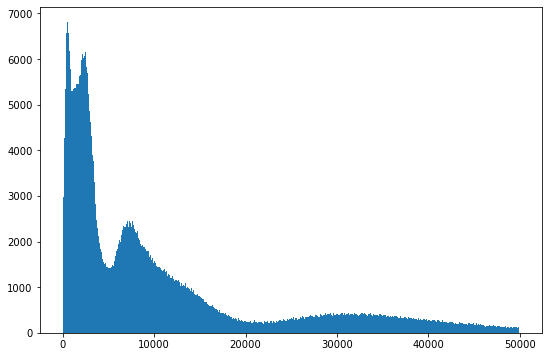

In [12]:
plt.hist(df[apc], bins=np.arange(0,50000,100))
plt.show()

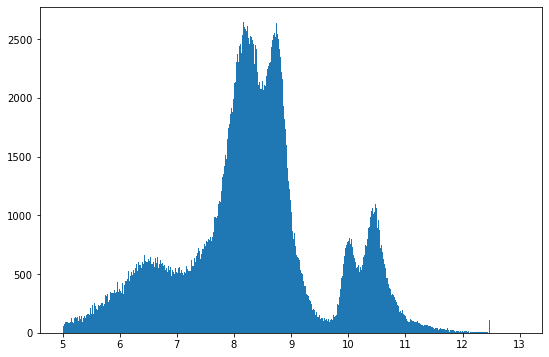

In [13]:
plt.hist(df[pac].apply(lambda _: np.log(np.clip(_, eps, None))), bins=np.arange(5,13,0.01))
plt.show()

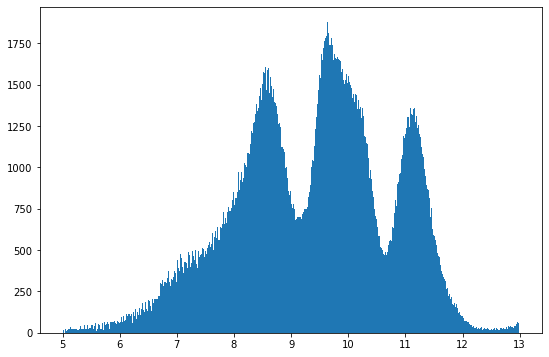

In [14]:
plt.hist(df[apc].apply(np.arcsinh), bins=np.arange(5,13,0.01))
plt.show()

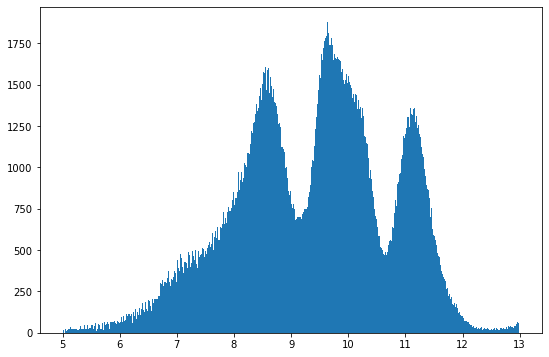

In [15]:
plt.hist(df[apc].apply(np.arcsinh), bins=np.arange(5,13,0.01))
plt.show()

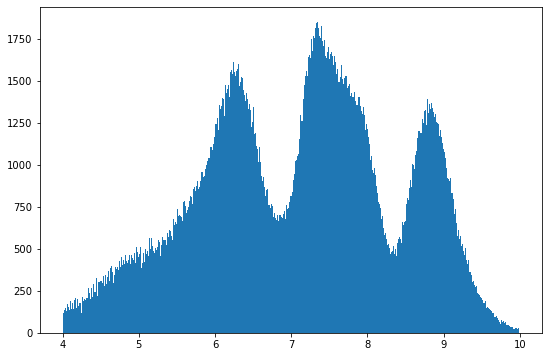

In [16]:
plt.hist(df[apc].apply(asinh), bins=np.arange(4,10,0.01))
plt.show()

In [17]:
redbow = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#0000ff'),
    (0.2, '#00ffff'),
    (0.4, '#00ff00'),
    (0.6, '#ffff00'),
    (0.8, '#ff0000'),
    (1, '#000000'),
], N=256)

In [18]:
def heatplot(df, x_label, y_label, f=None, title=None):
    x = df[x_label]
    y = df[y_label]
    if f:
        x = x.apply(f)
        y = y.apply(f)
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=redbow)
    fig.colorbar(density, label='Points per pixel')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)
    plt.show()

In [19]:
%matplotlib widget
plt.rcParams['figure.figsize'] = [9,6]

In [20]:
heatplot(df, pac, apc)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ubuntu/anaconda3/envs/tf/lib/python3.9/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


In [21]:
heatplot(df, pac, apc, f=asinh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [22]:
heatplot(df, 'FSC-W', 'FSC-A', f=asinh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [33]:
heatplot(df, 'SSC-A', 'FSC-A', f=asinh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [34]:
heatplot(df, 'SSC-A', pac, f=asinh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
heatplot(df, 'SSC-A', apc, f=np.arcsinh)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [26]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [9,6]

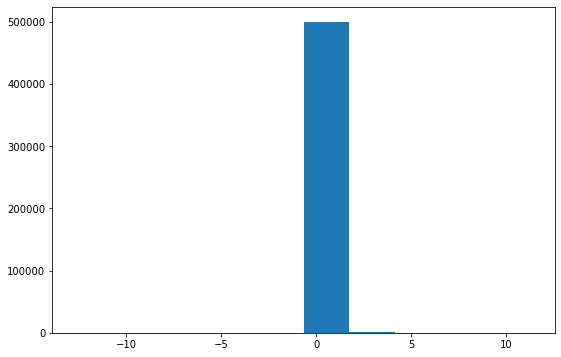

In [27]:
plt.hist(df[pac]/df['SSC-A'])
plt.show()

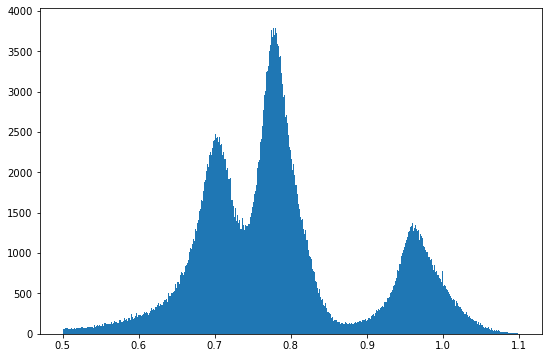

In [28]:
plt.hist(df[pac].apply(asinh)/df['SSC-A'].apply(asinh), bins=np.arange(0.5, 1.1, 0.001))
plt.show()

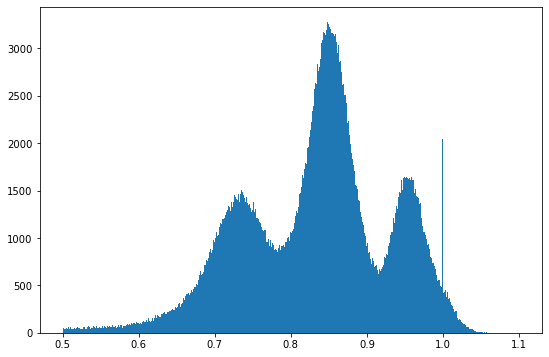

In [29]:
plt.hist(df[apc].apply(asinh)/df['SSC-A'].apply(asinh), bins=np.arange(0.5, 1.1, 0.001))
plt.show()

In [30]:
%matplotlib widget
plt.rcParams['figure.figsize'] = [9,6]

In [31]:
def heatplot_simple(x, y, xlabel=None, ylabel=None, title=None):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='scatter_density')
    density = ax.scatter_density(x, y, cmap=redbow)
    fig.colorbar(density, label='Points per pixel')
    if xlabel:
        ax.set_xlabel(x_label)
    if ylabel:
        ax.set_ylabel(y_label)
    if title:
        ax.set_title(title)
    plt.show()

In [32]:
heatplot_simple(df[pac].apply(asinh)/df['SSC-A'].apply(asinh), df[apc].apply(asinh)/df['SSC-A'].apply(asinh))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …